<a href="https://colab.research.google.com/github/shilpagandham2/AI-Sports-Analytics-Skillzo.ai-User-Archetypes/blob/main/electric_usage_baseline_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('kcpk_electric_usage_interval_data_Service 1_1_2024-11-01_to_2025-10-31 2 (2).csv')

from skimpy import skim
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35010  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 7      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃       ┃          ┃          ┃          ┃          ┃          ┃ chars per ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA    ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ row       ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Unnamed: │     1 │ 0.002856 │   Name   │ Account  │ Account  │   TYPE   │        14 │        2 │     70014 │  │
│ │    0     │       │ 32676378 │          │  Number  │  Number  │          │           │          │           │  │
│ │          │       │    17767 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     1 │ 0.002856 │   DATE   │  15207   │  15207   │ Service  │        10 │        1 │     35017 │  │
│ │    1     │       │ 32676378 │          │  REEDS   │  REEDS   │    1     │           │          │           │  │
│ │          │       │    17767 │          │   ST,    │   ST,    │          │           │          │           │  │
│ │          │       │          │          │ OVERLAND │ OVERLAND │          │           │          │           │  │
│ │          │       │          │          │ PARK KS  │ PARK KS  │          │           │          │           │  │
│ │          │       │          │          │  66223   │  66223   │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │  00:00   │  START   │  00:00   │  START   │         5 │        1 │     35006 │  │
│ │    2     │       │ 63381890 │          │   TIME   │          │   TIME   │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │  00:14   │ END TIME │  00:14   │ END TIME │         5 │        1 │     35006 │  │
│ │    3     │       │ 63381890 │          │          │          │          │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │   0.22   │  USAGE   │   0.00   │  USAGE   │         4 │        1 │     35006 │  │
│ │    4     │       │ 63381890 │          │  (kWh)   │          │  (kWh)   │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │   COST   │  $0.02   │  $0.00   │   COST   │         5 │        1 │     35005 │  │
│ │    5     │       │ 63381890 │          │          │          │          │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │ 35009 │ 99.99714 │  NOTES   │  NOTES   │ 

In [13]:
import pandas as pd

file = 'kcpk_electric_usage_interval_data_Service 1_1_2024-11-01_to_2025-10-31 2 (2).csv'
df = pd.read_csv(file, header=5)

df.head()
df.columns
df_raw = pd.read_csv(file, header=None)
df_raw.head(10)
new_header = df_raw.iloc[5]
df = df_raw[6:]   # data starts after header row
df.columns = new_header
df.head()
df.columns = df.columns.str.strip()
df.head()


5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,NOTES
7,Electric usage,2024-11-01,00:00,00:14,0.22,$0.02,NaN
8,Electric usage,2024-11-01,00:15,00:29,0.14,$0.02,NaN
9,Electric usage,2024-11-01,00:30,00:44,0.09,$0.01,NaN
10,Electric usage,2024-11-01,00:45,00:59,0.09,$0.01,NaN


['TYPE', 'DATE', 'START TIME', 'END TIME', 'USAGE (kWh)', 'COST', 'NOTES']
[nan, nan, nan, nan, nan, nan, nan]


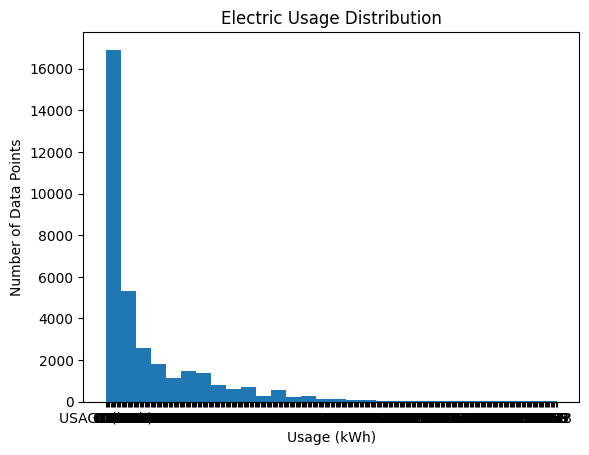

In [21]:
print(list(df.columns))
df.columns = df.columns.astype(str).str.strip()
df_raw.iloc[5]

print(df_raw.iloc[5].tolist())
df = df_raw[6:]  # data rows

df.columns = ['TYPE', 'DATE', 'START TIME', 'END TIME', 'USAGE (kWh)', 'COST', 'NOTES']

df.head()
import matplotlib.pyplot as plt

plt.hist(df['USAGE (kWh)'].dropna(), bins=30)
plt.title('Electric Usage Distribution')
plt.xlabel('Usage (kWh)')
plt.ylabel('Number of Data Points')
plt.show()



In [23]:
import numpy as np
df['USAGE (kWh)'] = pd.to_numeric(df['USAGE (kWh)'], errors='coerce')

print(
    "Average Usage: " + str(np.mean(df['USAGE (kWh)'])) +
    " | Standard Dev: " + str(np.std(df['USAGE (kWh)']))
)
# sd>mean


Average Usage: 0.42341618100788486 | Standard Dev: 0.6666015400655594


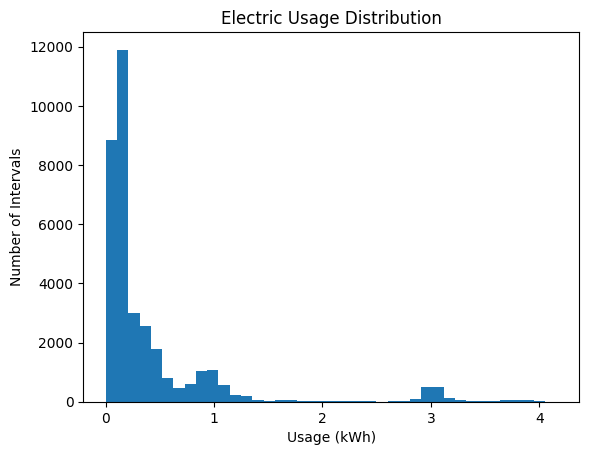

In [24]:
import matplotlib.pyplot as plt

plt.hist(df['USAGE (kWh)'].dropna(), bins=40)
plt.title('Electric Usage Distribution')
plt.xlabel('Usage (kWh)')
plt.ylabel('Number of Intervals')
plt.show()


In [25]:
mean_usage = df['USAGE (kWh)'].mean()
std_usage  = df['USAGE (kWh)'].std()

print(f"Average Usage: {mean_usage:.4f} | Standard Dev: {std_usage:.4f}")


Average Usage: 0.4234 | Standard Dev: 0.6666


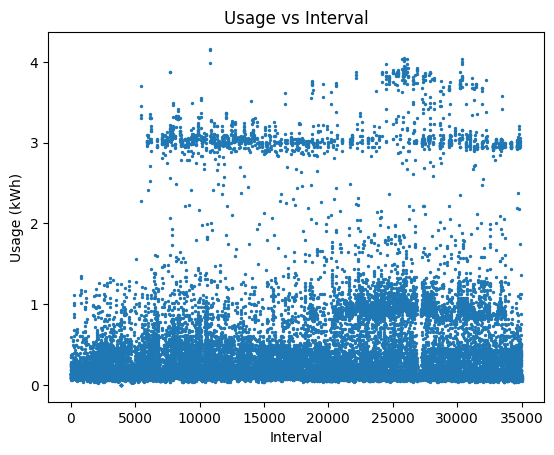

In [27]:
df = df.reset_index(drop=True)
df['interval'] = df.index
import matplotlib.pyplot as plt

plt.scatter(df['interval'], df['USAGE (kWh)'], s=2)

plt.title('Usage vs Interval')
plt.xlabel('Interval')
plt.ylabel('Usage (kWh)')

plt.show()


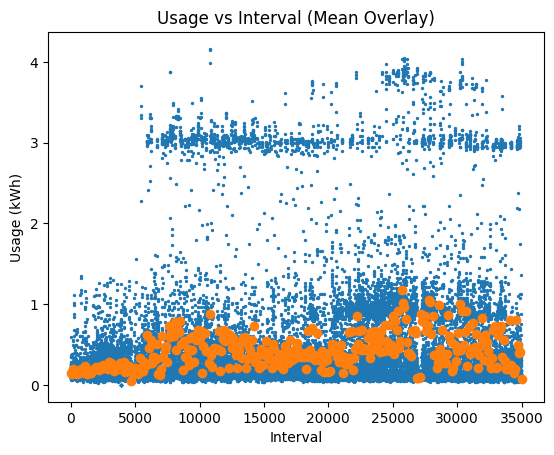

In [28]:
mean_usage = df.groupby(df['interval'] // 100)['USAGE (kWh)'].mean()
plt.scatter(df['interval'], df['USAGE (kWh)'], s=2)
plt.scatter(mean_usage.index * 100, mean_usage.values)

plt.title('Usage vs Interval (Mean Overlay)')
plt.xlabel('Interval')
plt.ylabel('Usage (kWh)')

plt.show()


In [29]:
from statsmodels.formula.api import ols
df = df.reset_index(drop=True)
df['interval'] = df.index
est = ols(formula="Q('USAGE (kWh)') ~ interval", data=df).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:       Q('USAGE (kWh)')   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     586.3
Date:                Thu, 19 Feb 2026   Prob (F-statistic):          1.81e-128
Time:                        19:40:00   Log-Likelihood:                -35181.
No. Observations:               35004   AIC:                         7.037e+04
Df Residuals:                   35002   BIC:                         7.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2752      0.007     38.942      0.0

In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 35010 entries, 0 to 35009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  35009 non-null  str  
 1   Unnamed: 1  35009 non-null  str  
 2   Unnamed: 2  35005 non-null  str  
 3   Unnamed: 3  35005 non-null  str  
 4   Unnamed: 4  35005 non-null  str  
 5   Unnamed: 5  35005 non-null  str  
 6   Unnamed: 6  1 non-null      str  
dtypes: str(7)
memory usage: 3.3 MB


In [4]:
df.head(6)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Name,RAKESH GANDHAM,NaN,NaN,NaN,NaN,NaN
1,Address,"15207 REEDS ST, OVERLAND PARK KS 66223",NaN,NaN,NaN,NaN,NaN
2,Account Number,5129046007,NaN,NaN,NaN,NaN,NaN
3,Service,Service 1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,NOTES


In [5]:
df.tail(6)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
35004,Electric usage,2025-10-31,22:30,22:44,0.09,$0.01,NaN
35005,Electric usage,2025-10-31,22:45,22:59,0.07,$0.01,NaN
35006,Electric usage,2025-10-31,23:00,23:14,0.06,$0.01,NaN
35007,Electric usage,2025-10-31,23:15,23:29,0.11,$0.01,NaN
35008,Electric usage,2025-10-31,23:30,23:44,0.05,$0.00,NaN
35009,Electric usage,2025-10-31,23:45,23:59,0.07,$0.01,NaN


In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35010  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 7      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃       ┃          ┃          ┃          ┃          ┃          ┃ chars per ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA    ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ row       ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Unnamed: │     1 │ 0.002856 │   Name   │ Account  │ Account  │   TYPE   │        14 │        2 │     70014 │  │
│ │    0     │       │ 32676378 │          │  Number  │  Number  │          │           │          │           │  │
│ │          │       │    17767 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     1 │ 0.002856 │   DATE   │  15207   │  15207   │ Service  │        10 │        1 │     35017 │  │
│ │    1     │       │ 32676378 │          │  REEDS   │  REEDS   │    1     │           │          │           │  │
│ │          │       │    17767 │          │   ST,    │   ST,    │          │           │          │           │  │
│ │          │       │          │          │ OVERLAND │ OVERLAND │          │           │          │           │  │
│ │          │       │          │          │ PARK KS  │ PARK KS  │          │           │          │           │  │
│ │          │       │          │          │  66223   │  66223   │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │  00:00   │  START   │  00:00   │  START   │         5 │        1 │     35006 │  │
│ │    2     │       │ 63381890 │          │   TIME   │          │   TIME   │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │  00:14   │ END TIME │  00:14   │ END TIME │         5 │        1 │     35006 │  │
│ │    3     │       │ 63381890 │          │          │          │          │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │   0.22   │  USAGE   │   0.00   │  USAGE   │         4 │        1 │     35006 │  │
│ │    4     │       │ 63381890 │          │  (kWh)   │          │  (kWh)   │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │     5 │ 0.014281 │   COST   │  $0.02   │  $0.00   │   COST   │         5 │        1 │     35005 │  │
│ │    5     │       │ 63381890 │          │          │          │          │           │          │           │  │
│ │          │       │     8884 │          │          │          │          │           │          │           │  │
│ │ Unnamed: │ 35009 │ 99.99714 │  NOTES   │  NOTES   │ 

In [7]:
df.iloc[0:20]



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Name,RAKESH GANDHAM,NaN,NaN,NaN,NaN,NaN
1,Address,"15207 REEDS ST, OVERLAND PARK KS 66223",NaN,NaN,NaN,NaN,NaN
2,Account Number,5129046007,NaN,NaN,NaN,NaN,NaN
3,Service,Service 1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,NOTES
6,Electric usage,2024-11-01,00:00,00:14,0.22,$0.02,NaN
7,Electric usage,2024-11-01,00:15,00:29,0.14,$0.02,NaN
8,Electric usage,2024-11-01,00:30,00:44,0.09,$0.01,NaN
9,Electric usage,2024-11-01,00:45,00:59,0.09,$0.01,NaN
